# LEARNING PYTORCH WITH EXAMPLES

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [3]:
%load_ext watermark
%config Completer.use_jedi = False

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)

import seaborn as sns
sns.set_theme()

#pd.set_option("max_columns", None)
#pd.set_option("max_rows", None)

#from IPython.display import Markdown, display
#def md(arg):
#    display(Markdown(arg))

#from pandas_profiling import ProfileReport
# report = ProfileReport(#DataFrame here#, minimal=True)
# report.to

#import pyarrow.parquet as pq
# df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

In [6]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.8.0-7630-generic
Machine     : x86_64
Processor   : 
CPU cores   : 8
Architecture: 64bit

Git hash: a33da1dcc598bb306270805564684c0e9ab55f67

Git repo: https://github.com/ysraell/examples.git

Git branch: master

json      : 2.0.9
numpy     : 1.19.5
torch     : 1.7.1+cpu
sys       : 3.7.9 (default, Jan 12 2021, 17:26:22) 
[GCC 8.3.0]
seaborn   : 0.11.1
ipywidgets: 7.6.3
pandas    : 1.2.1
matplotlib: 3.3.4

CPU	: Intel(R) Xeon(R) CPU E3-1241 v3 @ 3.50GHz
Mem:           31G
Swap:         4.0G


# Warm-up: numpy

In [46]:
# -*- coding: utf-8 -*-
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
e = np.random.randn()

learning_rate = 2e-7
for t in range(20000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3 + e x^4
    f_pol = lambda t: a + b * t + c * t ** 2 + d * t ** 3 + e * t ** 4
    y_pred = f_pol(x)
    
    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 1000 == 999:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    grad_e = (grad_y_pred * x ** 4).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    e -= learning_rate * grad_e

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3 + {e} x^4')

999 2250.4609999874165
1999 1001.3454160152141
2999 455.89315029916105
3999 213.55313570972996
4999 104.76585141161375
5999 55.23947169259888
6999 32.22545546813724
7999 21.218606469127888
8999 15.74909915095322
9999 12.900225728038738
10999 11.335924695116159
11999 10.429862494533706
12999 9.878879858142595
13999 9.530031731427544
14999 9.302242385189144
15999 9.150166381121707
16999 9.047079423340632
17999 8.976488132516472
18999 8.927828416955144
19999 8.894143625091715
Result: y = -0.01140844591875311 + 0.8561854902699844 x + 0.006289147489115462 x^2 + -0.09325139494031302 x^3 + -0.0006082060366517008 x^4


<AxesSubplot:>

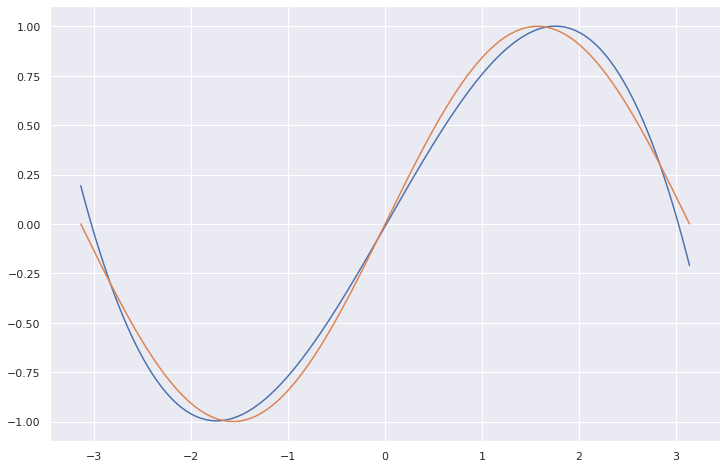

In [47]:
sns.lineplot(x=x,y=y_pred)
sns.lineplot(x=x,y=y)

# PyTorch: Tensors

In [49]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)
e = torch.randn((), device=device, dtype=dtype)

learning_rate = 2e-7
for t in range(20000):
    # Forward pass: compute predicted y
    f_pol = lambda t: a + b * t + c * t ** 2 + d * t ** 3 + e * t ** 4
    y_pred = f_pol(x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 1000 == 999:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    grad_e = (grad_y_pred * x ** 4).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    e -= learning_rate * grad_e



print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3 + {e} x^4')

999 701.803955078125
1999 344.3699645996094
2999 222.8058624267578
3999 151.16676330566406
4999 105.15562438964844
5999 74.72076416015625
6999 54.21614456176758
7999 40.2316780090332
8999 30.61717987060547
9999 23.9726619720459
10999 19.365436553955078
11999 16.164094924926758
12999 13.936650276184082
13999 12.385549545288086
14999 11.30484390258789
15999 10.551637649536133
16999 10.026561737060547
17999 9.66048526763916
18999 9.405228614807129
19999 9.227245330810547
Result: y = -0.026386572048068047 + 0.8568912148475647 x + 0.014546163380146027 x^2 + -0.09335179626941681 x^3 + -0.0014067201409488916 x^4


<AxesSubplot:>

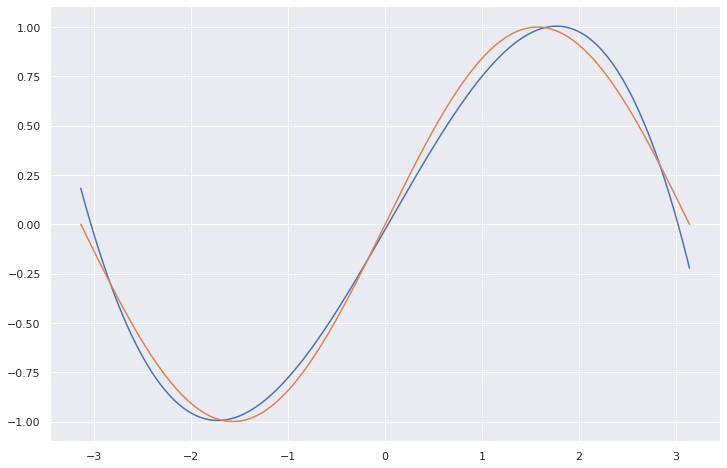

In [50]:
sns.lineplot(x=x,y=y_pred)
sns.lineplot(x=x,y=y)

# PyTorch: Tensors and autograd

In [15]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)
e = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 2e-7
for t in range(20000):
    # Forward pass: compute predicted y
    f_pol = lambda t: a + b * t + c * t ** 2 + d * t ** 3 + e * t ** 4
    y_pred = f_pol(x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 1000 == 999:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        e -= learning_rate * e.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        e.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {e.item()} x^4')

999 943.3627319335938
1999 625.8726806640625
2999 436.10321044921875
3999 305.9770812988281
4999 215.7102813720703
5999 152.95040893554688
6999 109.2657699584961
7999 78.83778381347656
8999 57.63422393798828
9999 42.854698181152344
10999 32.551090240478516
11999 25.36712074279785
12999 20.357900619506836
13999 16.864961624145508
14999 14.429250717163086
15999 12.730748176574707
16999 11.546298027038574
17999 10.72033405303955
18999 10.144346237182617
19999 9.742682456970215
Result: y = -0.03964174911379814 + 0.856669008731842 x + 0.021853355690836906 x^2 + -0.09332017600536346 x^3 + -0.002113376511260867 x^4


<AxesSubplot:>

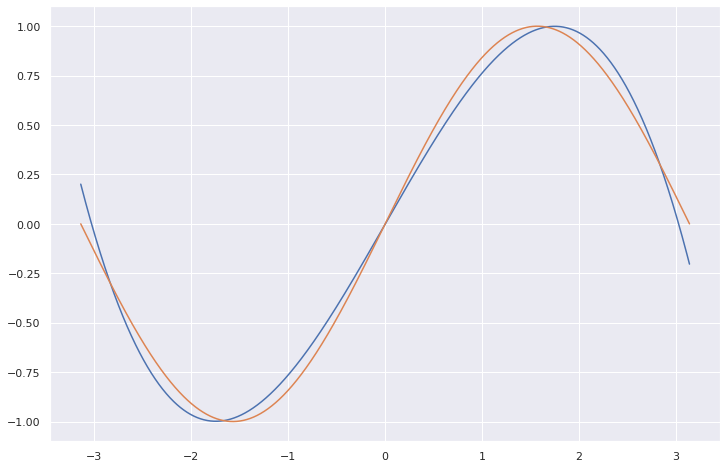

In [14]:
sns.lineplot(x=x.detach().numpy(),y=y_pred.detach().numpy())
sns.lineplot(x=x.detach().numpy(),y=y.detach().numpy())

# PyTorch: Defining new autograd functions

In [2]:
# -*- coding: utf-8 -*-
import torch
import math


class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    f_pol = lambda x: a + b * P3(c + d * x)
    y_pred = f_pol(x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.7457275390625
999 14.877889633178711
1099 12.93176555633545
1199 11.610918998718262
1299 10.71425724029541
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003360748291016
1999 8.943639755249023
Result: y = -5.394172664097141e-09 + -2.208526849746704 * P3(1.367587154632588e-09 + 0.2554861009120941 x)


<AxesSubplot:>

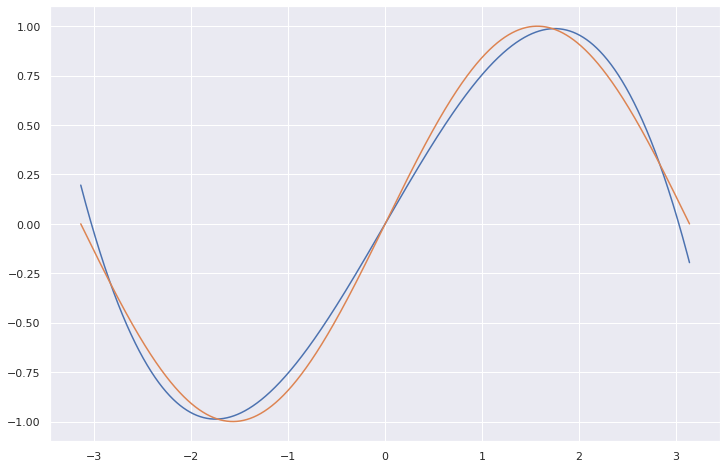

In [17]:
sns.lineplot(x=x.detach().numpy(),y=y_pred.detach().numpy())
sns.lineplot(x=x.detach().numpy(),y=y.detach().numpy())

# PyTorch: nn

In [41]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

In [61]:

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 106.31704711914062
199 74.13568115234375
299 52.60853576660156
399 38.19856262207031
499 28.545875549316406
599 22.075199127197266
699 17.734420776367188
799 14.82011604309082
899 12.861906051635742
999 11.545035362243652
1099 10.658674240112305
1199 10.061551094055176
1299 9.65890121459961
1399 9.387130737304688
1499 9.203512191772461
1599 9.07932186126709
1699 8.995254516601562
1799 8.938277244567871
1899 8.89962387084961
1999 8.873369216918945
Result: y = 0.005354426335543394 + 0.851362407207489 x + -0.0009237284539267421 x^2 + -0.09256535023450851 x^3


<AxesSubplot:>

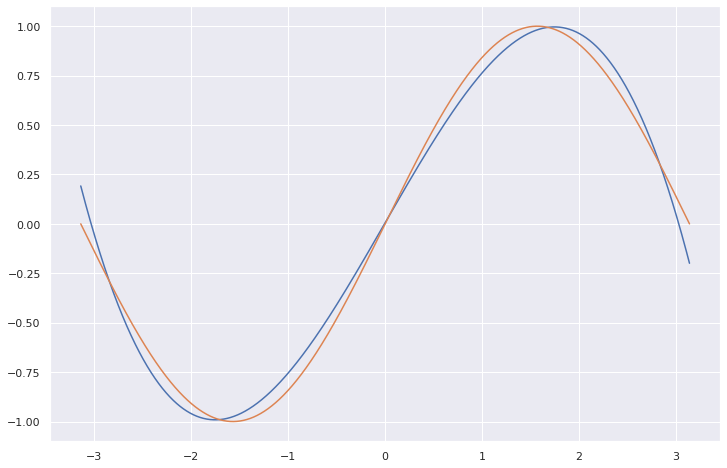

In [68]:
a = linear_layer.bias.item()
b, c, d = linear_layer.weight[:, 0].item(), linear_layer.weight[:, 1].item(), linear_layer.weight[:, 2].item()
f_pol = lambda t: a + b * t + c * t ** 2 + d * t ** 3
y_pred = f_pol(x)
sns.lineplot(x=x.detach().numpy(),y=y_pred.detach().numpy())
sns.lineplot(x=x.detach().numpy(),y=y.detach().numpy())

# PyTorch: optim

In [69]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 12485.86328125
199 4344.0166015625
299 1522.47314453125
399 787.5787963867188
499 613.1212158203125
599 498.9194030761719
699 388.7646789550781
799 287.0921325683594
899 201.0386962890625
999 133.3993682861328
1099 82.96974182128906
1199 47.65850067138672
1299 25.527868270874023
1399 14.039079666137695
1499 9.770339012145996
1599 8.893515586853027
1699 8.827069282531738
1799 8.847651481628418
1899 8.918880462646484
1999 8.96899700164795
Result: y = 0.0005494305514730513 + 0.8561616539955139 x + 0.0005514185759238899 x^2 + -0.0939440056681633 x^3


<AxesSubplot:>

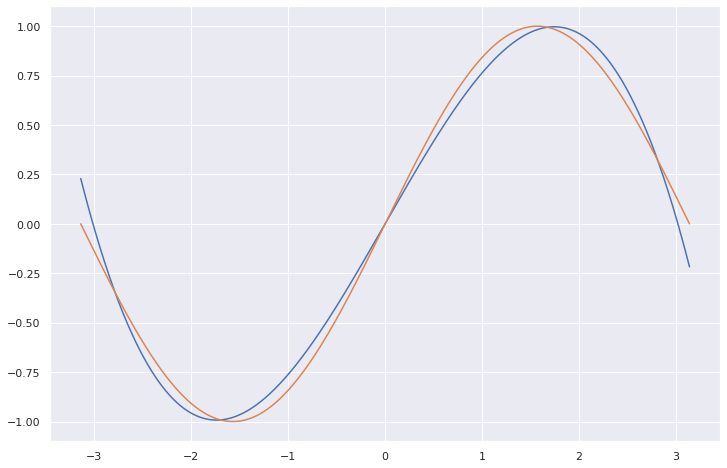

In [70]:
a = linear_layer.bias.item()
b, c, d = linear_layer.weight[:, 0].item(), linear_layer.weight[:, 1].item(), linear_layer.weight[:, 2].item()
f_pol = lambda t: a + b * t + c * t ** 2 + d * t ** 3
y_pred = f_pol(x)
sns.lineplot(x=x.detach().numpy(),y=y_pred.detach().numpy())
sns.lineplot(x=x.detach().numpy(),y=y.detach().numpy())

# PyTorch: Custom nn Modules

In [71]:
# -*- coding: utf-8 -*-
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the nn.Linear
# module which is members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 1069.163330078125
199 745.5406494140625
299 521.1470947265625
399 365.40814208984375
499 257.2178649902344
599 181.99232482910156
699 129.64161682128906
799 93.17933654785156
899 67.76280212402344
999 50.03196334838867
1099 37.65345001220703
1199 29.005359649658203
1299 22.959348678588867
1399 18.729656219482422
1499 15.768775939941406
1599 13.694832801818848
1699 12.241320610046387
1799 11.222067832946777
1899 10.506948471069336
1999 10.00498104095459
Result: y = 0.03469391539692879 + 0.8463847637176514 x + -0.005985280033200979 x^2 + -0.09185732156038284 x^3


<AxesSubplot:>

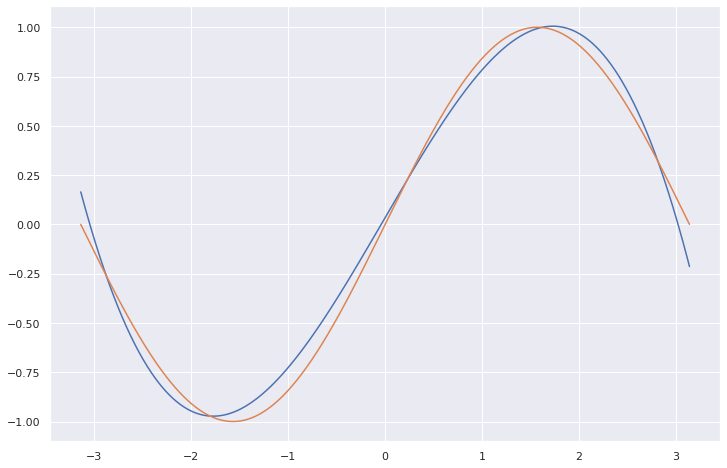

In [72]:
y_pred = model.forward(x)
sns.lineplot(x=x.detach().numpy(),y=y_pred.detach().numpy())
sns.lineplot(x=x.detach().numpy(),y=y.detach().numpy())

In [84]:
# -*- coding: utf-8 -*-
import torch
import math


class Polynomial5(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))
        self.f = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3 + self.e * x ** 4 + self.f * x ** 5

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 + {self.f.item()} x^5'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial5()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the nn.Linear
# module which is members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=5.5e-8)
for t in range(40000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 1000 == 999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

999 2950.0927734375
1999 1336.650390625
2999 1125.9888916015625
3999 1011.4682006835938
4999 923.360107421875
5999 848.8953247070312
6999 783.0528564453125
7999 723.5142211914062
8999 669.0919189453125
9999 619.0897216796875
10999 573.0338134765625
11999 530.5590209960938
12999 491.35845947265625
13999 455.1625061035156
14999 421.729248046875
15999 390.8389587402344
16999 362.2903137207031
17999 335.899169921875
18999 311.49652099609375
19999 288.9268798828125
20999 268.0475158691406
21999 248.72731018066406
22999 230.84561157226562
23999 214.2913818359375
24999 198.96255493164062
25999 184.76531982421875
26999 171.61302185058594
27999 159.42616271972656
28999 148.13131713867188
29999 137.6609344482422
30999 127.95287322998047
31999 118.94963836669922
32999 110.59829711914062
33999 102.85018920898438
34999 95.66020202636719
35999 88.98701477050781
36999 82.7919921875
37999 77.03997802734375
38999 71.6981430053711
39999 66.73634338378906
Result: y = -0.13307684659957886 + 0.584009230136

<AxesSubplot:>

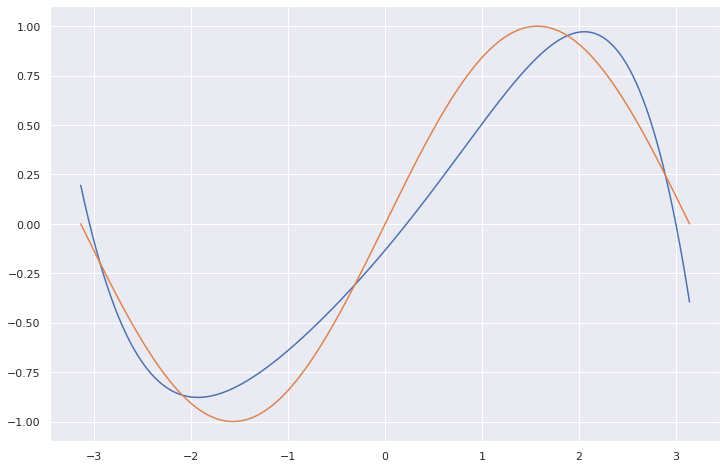

In [85]:
y_pred = model.forward(x)
sns.lineplot(x=x.detach().numpy(),y=y_pred.detach().numpy())
sns.lineplot(x=x.detach().numpy(),y=y.detach().numpy())

# PyTorch: Control Flow + Weight Sharing

In [86]:
# -*- coding: utf-8 -*-
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 394.9647521972656
3999 185.05186462402344
5999 90.28553009033203
7999 47.686866760253906
9999 27.882287979125977
11999 17.846418380737305
13999 13.128305435180664
15999 10.852129936218262
17999 9.730648040771484
19999 9.187127113342285
21999 8.944036483764648
23999 8.871126174926758
25999 8.891839027404785
27999 8.847847938537598
29999 8.83977222442627
Result: y = -0.0028590084984898567 + 0.8559914231300354 x + 1.4942669622541871e-05 x^2 + -0.09337738156318665 x^3 + 9.985672659240663e-05 x^4 ? + 9.985672659240663e-05 x^5 ?


<AxesSubplot:>

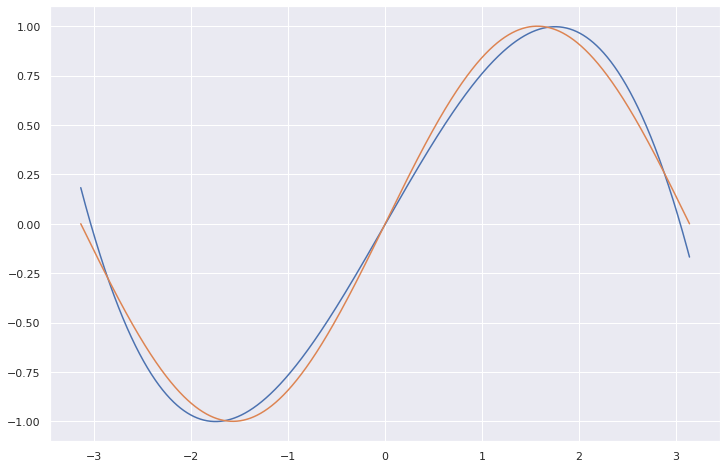

In [88]:
y_pred = model.forward(x)
sns.lineplot(x=x.detach().numpy(),y=y_pred.detach().numpy())
sns.lineplot(x=x.detach().numpy(),y=y.detach().numpy())